Olá, Isabelle!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa concluir três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva seu plano

In [1]:
import pandas as pd

In [2]:
orders_df = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
products_df = pd.read_csv('/datasets/products.csv',sep=';')
aisles_df = pd.read_csv('/datasets/aisles.csv',sep=';')
departments_df = pd.read_csv('/datasets/departments.csv',sep=';')
order_products_df = pd.read_csv('/datasets/order_products.csv',sep=';')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante leu corretamente os arquivos de dados.
</div>

In [3]:
orders_df.info()
# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
products_df.info() # imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
aisles_df.info() # imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
departments_df.info() # imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
order_products_df.info() # imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante verificou corretamente as informações sobre os dataframes. Essa etapa é importante para validar que os dados estão no formato correto e se existem atributos que irão precisar de tratamento adicional (preenchimento/imputação de dados, por exemplo).
</div>

## Conclusões

Todos os arquivos CSVs estavam separados por ';', foi necessário utilizar o comando sept = para uma leitura correta dos arquivos. 
Temos uma diversidade nos dados, sendo eles números inteiros, flutuantes e dados do tipo objeto. 


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante leu corretamente os dados, atentando para o separador entre colunas.
</div>

# Etapa 2

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.


## Plano de solução

Para verificar os dados e corrigir alguma divergência neles:
1.Filtrar e verificar se há pedidos duplicados.
2.Verificar se a coluna contém apenas números inteiros e não mistura de tipos de dados como: valores não numéricos ou caracteres especiais. 
3.Ter a certeza de que os valores da coluna devem ser números inteiros, convertendo novamente após a limpeza dos dados.

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `orders`

In [8]:
orders_df[orders_df.duplicated(subset = 'order_id', keep = False)].sort_values('order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
250626,467134,63189,21,3,2,2.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
242618,1021560,53767,3,3,2,9.0


Há linhas duplicadas na coluna 'order_id', todas as linhas estão trazendo a informação do tipo números inteiros, exceto a coluna 'days_since_prior_order', onde temos número flutuantes e valores ausentes representados por NaN.

In [9]:
# Com base nas suas conclusões,
orders_df[(orders_df['order_dow']==3)&(orders_df['order_hour_of_day']==2)].sort_values('order_id')
# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
...,...,...,...,...,...,...
97378,3226444,149996,3,3,2,23.0
416198,3275652,169225,7,3,2,30.0
415975,3286161,77320,9,3,2,8.0
457013,3384021,14881,6,3,2,30.0


Ao filtrar os pedidos feitos as 2 horas da manhã na quarta-feira, observamos que não aponta a duplicidade nas informações de 'order_id'.

In [10]:
orders_df.drop_duplicates(subset=['order_id'], keep='first', inplace=True)
# Remova pedidos duplicados

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante tratou a duplicidade nos dados do atributo `order_id`. Vale destacar que nem sempre gostaríamos de manter o primeiro evento ao remover os duplicados. Você consegue pensar em algum caso de uso onde gostaríamos de manter o último evento ao invés do primeiro?
</div>

In [11]:
orders_df[orders_df.duplicated(subset = 'order_id', keep = False)].sort_values('order_id')
# Verifique as linhas duplicadas mais uma vez

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [12]:
orders_df.duplicated(keep=False).value_counts()
# Verifique novamente apenas os IDs de pedidos duplicados

False    478952
dtype: int64

Os pedidos duplicados, ocorrem no mesmo dia e horário. 

### DataFrame `products`

In [13]:
products_df.duplicated(keep=False).value_counts()
# Verifique se há linhas completamente duplicadas

False    49694
dtype: int64

In [14]:
products_df[products_df.duplicated(subset = 'product_id', keep = False)]
# Verifique apenas se há IDs dos produtos duplicados

,product_id,product_name,aisle_id,department_id


In [15]:
products_df['product_name'] = products_df['product_name'].str.lower()
# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)

In [16]:
products_df[products_df.duplicated(subset='product_name', keep='first')]
# Verifique os nomes de produtos duplicados que não estão faltando

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


Não há nomes duplicados, porém, há muitos produtos com o nome ausente representados por NaN.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante verificou a existência de atributos duplicados no conjunto de dados de produto. 

<br>

Uma outra forma de verificar se existem valores duplicados para um atributo e também verificar qual valor está sendo repetido:
        ```dataframe[attr].value_counts()```
</div>

### DataFrame `departments`

In [17]:
departments_df.duplicated(keep=False).value_counts()
    #Verifique se há linhas completamente duplicadas

False    21
dtype: int64

In [18]:
departments_df[departments_df.duplicated(subset = 'department_id', keep = False)]
# Verifique apenas se há IDs dos produtos duplicados

,department_id,department


Não há valores duplicados para este arquivo, não sendo necessário qualquer tratamento nos dados.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante verificou a existência de atributos com valores duplicados no conjunto de dados `departments`.
</div>

### DataFrame `aisles`

In [19]:
aisles_df.duplicated(keep=False).value_counts()
# Verifique se há linhas completamente duplicadas

False    134
dtype: int64

In [20]:
aisles_df.duplicated(subset=['aisle_id']).value_counts()
# Verifique apenas se há IDs dos produtos duplicados

False    134
dtype: int64

Não há valores duplicados para este arquivo, não sendo necessário qualquer tratamento nos dados.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante verificou a existência de atributos com valores duplicados no conjunto de dados `aisles`.
</div>

### DataFrame `order_products`

In [21]:
order_products_df.duplicated(keep=False).value_counts()
# Verifique se há linhas completamente duplicadas

False    4545007
dtype: int64

In [22]:
order_products_df.duplicated(subset=['order_id', 'product_id'], keep=False).value_counts()
# Verifique mais uma vez se há outros casos complicados de duplicados

False    4545007
dtype: int64

Não há valores duplicados para este arquivo, não sendo necessário qualquer tratamento nos dados.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante verificou a existência de atributos com valores duplicados no conjunto de dados `order_products`.
</div>

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [23]:
products_df[products_df['product_name'].isna()]
# Encontre valores ausentes na coluna 'product_name'

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Podemos ver que a coluna 'product_name', 'aisle_id' e 'department_id' possuem uma correlação nas informações.

In [24]:
products_df[products_df['product_name'].isna()].eq(100).all()
# Todos os nomes de produtos ausentes estão associados com a seção de ID 100?

product_id       False
product_name     False
aisle_id          True
department_id    False
dtype: bool

Através disso conseguimos ver que os produtos ausente estão associados a seção de ID 100.

In [25]:
products_df[products_df['product_name'].isna()==21].all()
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

product_id       True
product_name     True
aisle_id         True
department_id    True
dtype: bool

Através disso conseguimos ver que os produtos ausente estão também ao departamento de ID 21.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante verificou a existência de valores faltantes para o conjunto de dados `products`. Uma outra forma de verificar a quantidade de valores nulos por atributo: ```dataframe.isna().sum()``` ou ```dataframe.groupby('column', dropna=False).sum()```. 
   
<br>
    
Obs.: Isso é só uma sugestão, não é necessário que você implemente dessa forma para passar no projeto, mas lembre dessas possbilidades para projetos futuros

</div>

In [26]:
products_df[(products_df['aisle_id']==100)&(products_df['department_id'] == 21)]
# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Através disso é possível ver que os produtos ausentes estão diretamente ligados ao departamento de ID 21 e a seção de ID 100.

In [27]:
products_df['product_name'].fillna('Unknown', inplace=True)
unknown_products = products_df[products_df['product_name'] == 'Unknown']
print(unknown_products)
# Preencha nomes de produtos ausentes com 'Unknown'

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Os produtos ausentes estão diretamente ligados ao departamento de ID 21 e a seção de ID 100.

### DataFrame `orders`

In [28]:
orders_df[orders_df['days_since_prior_order'].isna()]
# Encontre os valores ausentes

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [29]:
orders_df[~orders_df['order_number'].isin(orders_df['order_number']==1)]
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


Os valores ausentes não estão ligados ao primeiro pedido do cliente, e sim aos demais pedidos. Dando o entendimento que ao primeiro pedido do cliente as informações são preenchidas com mais cuidado e atenção, sendo deixada a desejar nos demais pedidos.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante verificou a existência de valores faltantes para o conjunto de dados `orders`.

</div>

### DataFrame `order_products`

In [30]:
order_products_df[order_products_df['add_to_cart_order'].isna()]
# Encontre os valores ausentes

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [31]:
min_value = order_products_df['add_to_cart_order'].min()
max_value = order_products_df['add_to_cart_order'].max()
print(min_value)
print(max_value)
# Quais são os valores mínimo e máximo dessa coluna?

1.0
64.0


Os pedidos que estão com a ordem sequencial ausente (NaN) são em sua maioria, de compras não recorrentes, ou seja, compra de produtos novos.

In [32]:
orders_with_missing_values = order_products_df[order_products_df['add_to_cart_order'].isna()]
order_ids_with_missing_values = orders_with_missing_values['order_id'].unique()
print(order_ids_with_missing_values)
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
orders_with_missing_values = order_products_df[order_products_df['add_to_cart_order'].isna()]
all_orders_above_64_products = all(orders_with_missing_values.groupby('order_id')['product_id'].count() > 64)
print(all_orders_above_64_products)
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
grouped_orders = orders_with_missing_values.groupby('order_id')['product_id'].count().reset_index()
print(grouped_orders)
# Agrupe os pedidos com dados ausentes por ID de pedido
min_product_count = grouped_orders['product_id'].min()
print(min_product_count)
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem


False
    order_id  product_id
0       9310           1
1      61355          63
2     102236          31
3     129627           5
4     165801           6
..       ...         ...
65   2999801           6
66   3125735          22
67   3308010          51
68   3347453           7
69   3383594           5

[70 rows x 2 columns]
1


Todas as compras com produtos novos e com menos de 64 produtos adicionados, geraram valores ausentes.

In [34]:
order_products_df['add_to_cart_order'].fillna(999, inplace=True)
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype(int)
new_order_products_df = order_products_df[order_products_df['add_to_cart_order'] == 999]
print(new_order_products_df)
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                999          0
9926      1968313       43867                999          0
14394     2926893       11688                999          0
16418     1717990        4142                999          0
30114     1959075       42828                999          1
...           ...         ...                ...        ...
4505662   1800005        7411                999          0
4511400   1633337         260                999          0
4517562    404157        9517                999          0
4534112   1673227       17835                999          0
4535739   1832957       17949                999          1

[836 rows x 4 columns]


Há algum produto novo cadastrado de forma incorreta, no qual, está prejudicando os dados gerados ao ser inserido no carrinho de compras.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante verificou a existência de valores faltantes para o conjunto de dados `order_products`. É muito comum que processos que envolvam preenchimento manual dos dados gerem inconsistência nas informações preenchidas. O tratamento correto desses dados é uma etapa muito importante de qualquer projeto de Dados.

</div>

## Conclusões

Trabalhamos com arquivos que tiveram uma maior atenção nas suas informações iniciais, e arquivos que faltou esta atenção inicial ao ser alimentado, demonstrando assim a importância dos preenchimentos das informações de forma correta, independente da fase da inserção das informações.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante verificou a existência de valores duplicados e ausentes para os conjunto de dados analisados.

</div>

# Etapa 3:

Quando os dados estiverem processados e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [35]:
unique_hours = orders_df['order_hour_of_day'].unique()
hour_check = all(0 <= hour <= 23 for hour in unique_hours)
print(hour_check)

True


In [36]:
unique_dow = orders_df['order_dow'].unique()
dow_check = all(0 <= dow <= 6 for dow in unique_dow)
print(dow_check)

True


Os valores da coluna 'order_hour_of_day' variam de 0 a 23 e os da 'order_dow' variam de 0 a 6.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante verificou corretamente a distribuição dos dados nas columas `order_hour_of_day` e `order_dow`. 
    
</div>

### [A2] Em que horas do dia as pessoas fazem compras?

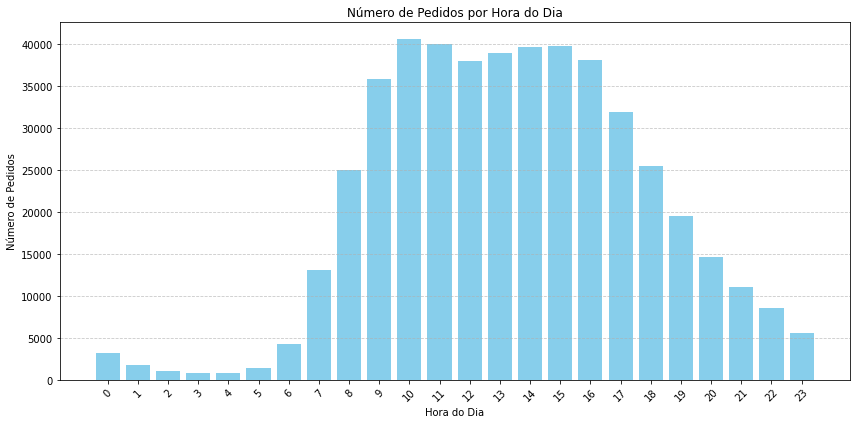

In [37]:
import matplotlib.pyplot as plt
order_counts_by_hour = orders_df['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(order_counts_by_hour.index, order_counts_by_hour.values, color='skyblue')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.title('Número de Pedidos por Hora do Dia')
plt.xticks(order_counts_by_hour.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

O horário ativo de compras é das 8:00 as 18:00, mas o horário de maior pico de compras é as 10:00.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante plotou corretamente a distribuição de compras por horário. O gráfico de distribuição é muito útil para entender o comportamento dos dados e pode te ajudar em muitas situações de análise exploratória.
    
</div>

### [A3] Em que dia da semana as pessoas fazem compras?

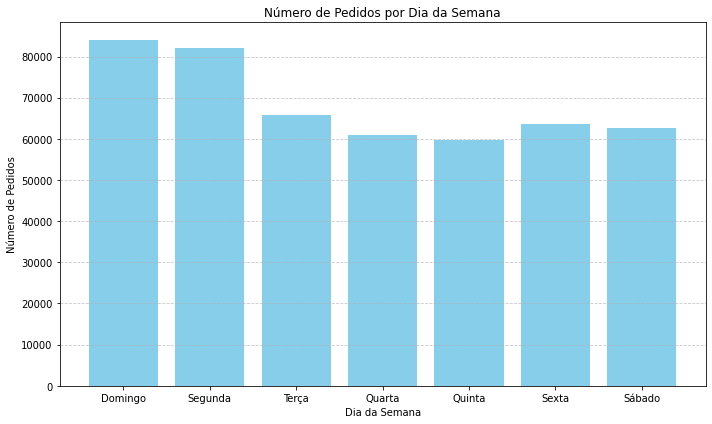

In [38]:
order_counts_by_dow = orders_df['order_dow'].value_counts().sort_index()
dow_labels = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']

plt.figure(figsize=(10, 6))
plt.bar(dow_labels, order_counts_by_dow.values, color='skyblue')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Pedidos')
plt.title('Número de Pedidos por Dia da Semana')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Aos domingos e segunda são os dias que as pessoas mais fazem compras.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante analisou corretamente a distribuição de compras por dia da semana. Vale destacar que quando não temos esse atributo do dia e usamos a biblioteca `pandas` para extrair o dia da semana da data, o index 0 representa o `Domingo` e assim por diante. 

<br>
    
Obs: Excelente gráfico!
    
</div>

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

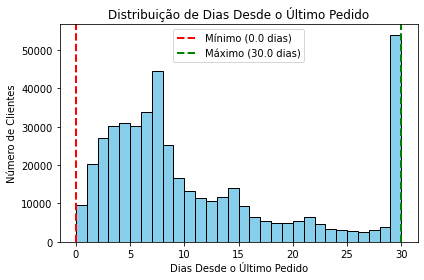

In [39]:
plt.hist(orders_df['days_since_prior_order'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Dias Desde o Último Pedido')
plt.ylabel('Número de Clientes')
plt.title('Distribuição de Dias Desde o Último Pedido')

min_days = orders_df['days_since_prior_order'].min()
max_days = orders_df['days_since_prior_order'].max()
plt.axvline(min_days, color='red', linestyle='dashed', linewidth=2, label=f'Mínimo ({min_days} dias)')
plt.axvline(max_days, color='green', linestyle='dashed', linewidth=2, label=f'Máximo ({max_days} dias)')

plt.legend()

plt.tight_layout()
plt.show()

As pessoas tendem a esperar 30 dias para realizar um novo pedido.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante analisou a distribuição do intervalo do tempo entre compras dos consumidores. 
    
</div>

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa histogramas para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie histogramas para ambos os dias e descreva as diferenças.

In [40]:
wednesday_data = orders_df[orders_df['order_dow'] == 2]

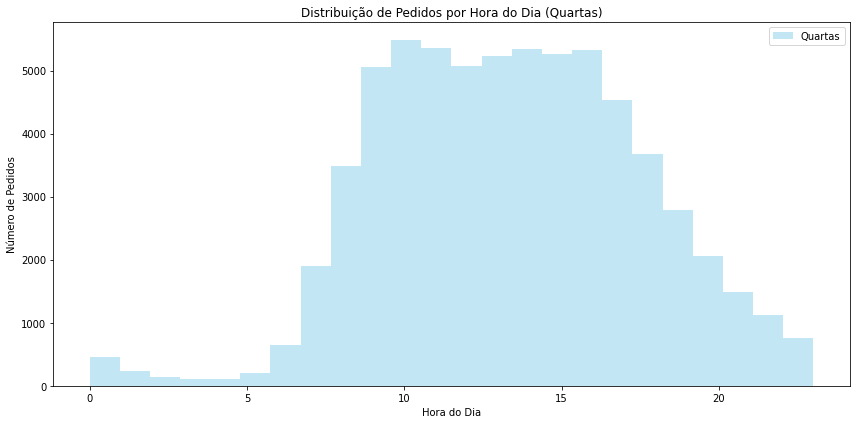

In [41]:
plt.figure(figsize=(12, 6))
plt.hist(wednesday_data['order_hour_of_day'], bins=24, alpha=0.5, color='skyblue', label='Quartas')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.title('Distribuição de Pedidos por Hora do Dia (Quartas)')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
saturday_data = orders_df[orders_df['order_dow'] == 5]

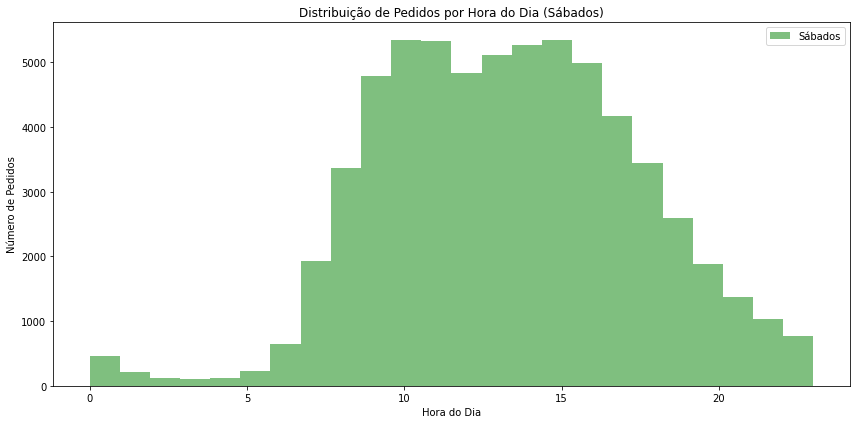

In [43]:
plt.figure(figsize=(12, 6))
plt.hist(saturday_data['order_hour_of_day'], bins=24, alpha=0.5, color='green', label='Sábados')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.title('Distribuição de Pedidos por Hora do Dia (Sábados)')
plt.legend()

plt.tight_layout()
plt.show()

Ambos os dias as compras começam em um pico as 10:00.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante analisou corretamente a distribuição de compras nas Quartas e sábados. Como sugestão, plote os dois gráficos na mesma figura e escala para poder comparar melhor as distribuições.
    
Segue como referência: https://www.geeksforgeeks.org/matplotlib-pyplot-subplots-in-python/. 
   
    
</div>

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [44]:
order_counts_by_user = orders_df['user_id'].value_counts()
order_counts_distribution = order_counts_by_user.value_counts().sort_index()

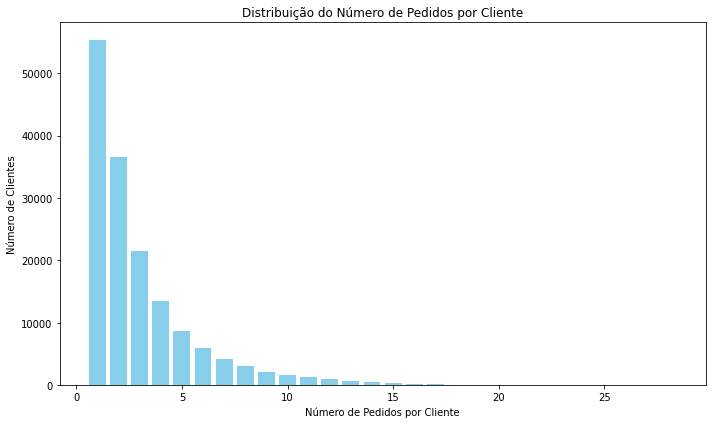

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(order_counts_distribution.index, order_counts_distribution.values, color='skyblue')
plt.xlabel('Número de Pedidos por Cliente')
plt.ylabel('Número de Clientes')
plt.title('Distribuição do Número de Pedidos por Cliente')

plt.tight_layout()
plt.show()

Os clientes tendem a fazer 1 pedido.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Esse é realmente o valor mais frequente na série? Verifique qual a maior barra nesse gráfico que você gerou (não confundir com a média/mediana). Uma outra alternativa é calcular o valor por faixa de compras manualmente e verificar. Entretanto, olhando para esse gráfico já é possível obter a resposta. Vale ressaltar que esse é um comportamento do tipo "long-tail", ou seja, muitos eventos são feitos por pouco usuários.   
    
</div>


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
Refiz o comentário</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2 </b> <a class="tocSkip"></a>

Ótimo!    
</div>

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [46]:
merged_df = pd.merge(order_products_df, products_df, on='product_id', how='inner')

In [47]:
product_counts = merged_df['product_name'].value_counts().reset_index()
product_counts.columns = ['product_name', 'purchase_count']
top_20_products = product_counts.head(21)

In [48]:
print(top_20_products[['product_name', 'purchase_count']])

                product_name  purchase_count
0                     banana           66050
1     bag of organic bananas           53297
2       organic strawberries           37039
3       organic baby spinach           33971
4       organic hass avocado           29773
5            organic avocado           24689
6                large lemon           21495
7               strawberries           20018
8                      limes           19690
9         organic whole milk           19600
10       organic raspberries           19197
11      organic yellow onion           15898
12            organic garlic           15292
13          organic zucchini           14584
14       organic blueberries           13879
15            cucumber kirby           13675
16        organic fuji apple           12544
17             organic lemon           12232
18  apple honeycrisp organic           11993
19    organic grape tomatoes           11781
20       seedless red grapes           11755


O produto mais popular é a banana.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui você está imprimindo a ordem de compra do produto e não a sua frequência. Pense em como você pode contar quantas vezes um produto foi comprado e depois ordenar essa lista para pegar os 20 mais frequentes.   
    
</div>


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
Refiz o código</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2</b> <a class="tocSkip"></a>

Ótimo!    
</div>

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [49]:
order_details = pd.merge(orders_df, order_products_df, on='order_id')

In [50]:
average_items_per_order = order_details.groupby('order_id')['product_id'].count().mean()

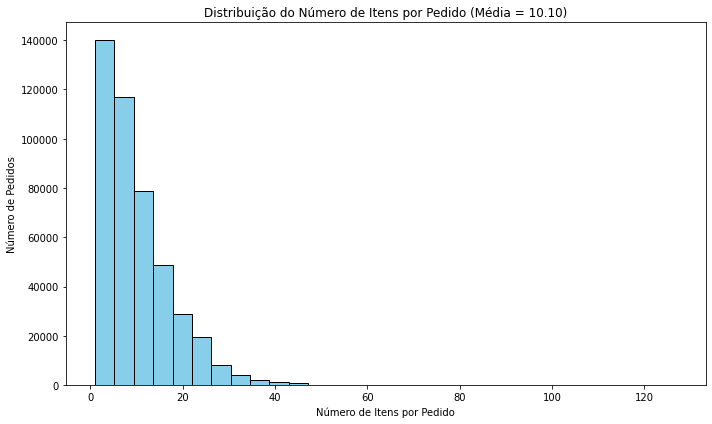

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(order_details.groupby('order_id')['product_id'].count(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Número de Itens por Pedido')
plt.ylabel('Número de Pedidos')
plt.title(f'Distribuição do Número de Itens por Pedido (Média = {average_items_per_order:.2f})')

plt.tight_layout()
plt.show()

As pessoas normalmente compram de 1 a 20 produtos por pedido.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente análise. Uma sugestão seria usar a função `pd.cut()` para agrupar os valores em faixas: 1-5, 5-10, etc.
   
    
</div>

### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [52]:
order_details = pd.merge(order_products_df, products_df, on='product_id')

In [53]:
reordered_products = order_details[order_details['reordered'] == 1]
product_reorder_counts = reordered_products['product_name'].value_counts().reset_index()
product_reorder_counts.columns = ['product_name', 'reorder_count']

In [54]:
top_20_reorder_products = product_reorder_counts.head(21)

In [55]:
print(top_20_reorder_products)

                  product_name  reorder_count
0                       banana          55763
1       bag of organic bananas          44450
2         organic strawberries          28639
3         organic baby spinach          26233
4         organic hass avocado          23629
5              organic avocado          18743
6           organic whole milk          16251
7                  large lemon          15044
8          organic raspberries          14748
9                 strawberries          13945
10                       limes          13327
11        organic yellow onion          11145
12              organic garlic          10411
13            organic zucchini          10076
14              cucumber kirby           9538
15          organic fuji apple           8989
16    apple honeycrisp organic           8836
17         organic blueberries           8799
18               organic lemon           8412
19         organic half & half           8389
20  sparkling water grapefruit    

Escreva suas conclusões aqui

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante calculou corretamente os produtos incluídos em pedidos repetidos.  
    
</div>

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [56]:
merged_df = pd.merge(order_products_df, products_df, on='product_id', how='inner')

In [57]:
product_purchase_counts = merged_df.groupby(['product_id', 'product_name'])['order_id'].nunique().reset_index()
product_repeated_counts = merged_df[merged_df['reordered'] == 1].groupby(['product_id', 'product_name'])['order_id'].nunique().reset_index()
product_purchase_counts.columns = ['product_id', 'product_name', 'total_purchases']
product_repeated_counts.columns = ['product_id', 'product_name', 'repeated_purchases']
merged_counts = pd.merge(product_purchase_counts, product_repeated_counts, on=['product_id', 'product_name'], how='left')
merged_counts['repeated_purchases'] = merged_counts['repeated_purchases'].fillna(0)
merged_counts['repeated_purchase_ratio'] = (merged_counts['repeated_purchases'] / merged_counts['total_purchases']) * 100

In [58]:
print(merged_counts[['product_id', 'product_name', 'repeated_purchase_ratio']])

       product_id                                       product_name  \
0               1                         chocolate sandwich cookies   
1               2                                   all-seasons salt   
2               3               robust golden unsweetened oolong tea   
3               4  smart ones classic favorites mini rigatoni wit...   
4               7                     pure coconut water with orange   
...           ...                                                ...   
45568       49690                      high performance energy drink   
45569       49691                      original pancake & waffle mix   
45570       49692    organic instant oatmeal light maple brown sugar   
45571       49693                             spring water body wash   
45572       49694                            burrito- steak & cheese   

       repeated_purchase_ratio  
0                    56.428571  
1                     0.000000  
2                    73.809524  
3  

Escreva suas conclusões aqui

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Nesse ponto precisamos de ajustes. O cálculo deve ser feito por produto e não usuário. Reveja a pergunta de negócio: Para cada produto, qual proporção de suas compras foi de produtos repetidos? Isso te dá também um indicativo de que esse percentual não pode ser > 100%.
    
<br>
Dica: use uma estratégia parecida utilizada na questão abaixo.
</div>


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
Refiz o código</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2 </b> <a class="tocSkip"></a>

Ficou muito bom com esse ajuste! Gostei que você teve o cuidado de usar `left` join para evitar de filtrar somente os produtos que tiveram em pedidos repetidos.
    
</div>

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [87]:
order_details = pd.merge(orders_df, order_products_df, on='order_id')
order_details['reordered'] = order_details['reordered'].fillna(0).astype(int)

In [88]:
total_orders_by_customer = order_details.groupby('user_id')['order_id'].nunique()
reordered_orders_by_customer = order_details[order_details['reordered'] == 1].groupby('user_id')['order_id'].nunique()
reorder_ratio_by_customer = (reordered_orders_by_customer / total_orders_by_customer).fillna(0)
result_df = pd.DataFrame({'user_id': reorder_ratio_by_customer.index, 'reorder_ratio': reorder_ratio_by_customer.values})
print(result_df)

        user_id  reorder_ratio
0             2            0.5
1             4            0.0
2             5            1.0
3             6            0.0
4             7            1.0
...         ...            ...
149621   206203            1.0
149622   206206            1.0
149623   206207            1.0
149624   206208            1.0
149625   206209            1.0

[149626 rows x 2 columns]


Escreva suas conclusões aqui

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante calculou corretamente os percentual de produtos repetidos por cliente.  
    
</div>

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [89]:
order_details = pd.merge(order_products_df, products_df, on='product_id')

In [91]:
first_added_to_cart = order_details[order_details['add_to_cart_order'] == 1]
first_added_counts = first_added_to_cart['product_name'].value_counts().reset_index()
first_added_counts.columns = ['product_name', 'first_added_count']
top_20_first_added_products = first_added_counts.head(21)

In [92]:
print(top_20_first_added_products)

                   product_name  first_added_count
0                        banana              15562
1        bag of organic bananas              11026
2            organic whole milk               4363
3          organic strawberries               3946
4          organic hass avocado               3390
5          organic baby spinach               3336
6               organic avocado               3044
7                  spring water               2336
8                  strawberries               2308
9           organic raspberries               2024
10   sparkling water grapefruit               1914
11          organic half & half               1797
12                  large lemon               1737
13                         soda               1733
14     organic reduced fat milk               1397
15                        limes               1370
16                hass avocados               1340
17  organic reduced fat 2% milk               1310
18                  half & half

Escreva suas conclusões aqui

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante calculou corretamente os produtos mais frequentes adicionados ao carrinho.  
    
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1 </b> <a class="tocSkip"></a>

Parabéns, você teve um grande esforço para chegar até aqui e fez um ótimo trabalho. Dentre os pontos positivos do seu projeto, gostaria de destacar os seguintes:
- Boa organização do código
- Gráficos bem apresentados e seguindo boas práticas
- Código limpo e comentado
    
Para seguirmos, gostaria que você ajustasse os pontos que comentei mais acima. Faltam apenas alguns ajustes e acredito que com essa versão você vai entregar um projeto ainda mais incrível. 
    
Lembrando que os comentários em amarelo são sugestões e não precisam ser implementados.
    
Qualquer dúvida, pode contar comigo.
    
    
<br>
    
    
**Até breve!**
    
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2 </b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e por fazer os ajustes sugeridos, essa versão ficou muito boa e espero que você tenha aprendido bastante no processo de revisão. 
    
Nesse projeto, acredito que foi possível consolidar alguns conhecimentos muito importantates e que são muito utilizados em projetos reais:
- Ler corretamente um gráfico de distribuição long-tail (esse tipo de distribuição está por toda parte, principalmente em redes sociais e e-commerce)
- Usar a operação correta ao fazer o `join` entre bases de dados
- Apresentar gráficos de forma intuitiva
      
<br>
    
No geral, o seu código é muito bem estruturado, os gráficos apresentados são bem relevantes e suas análises pertinentes.
   
    
Você finalizou o projeto. Te desejo sucesso nessa jornada de aprendizado e pode contar comigo nesse processo.

<br>

**Até breve!**
</div>